In [89]:
## import necessary libraries
import numpy as np
import pandas as pd

In [90]:
## read the raw data file
df = pd.read_csv('raw_data/diabetes_012_health_indicators_BRFSS2015.csv')
print('The dataframe has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print(df.columns.values)
df.head()

The dataframe has 253680 rows and 22 columns
['Diabetes_012' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [91]:
df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']] = df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']].astype(int)

In [92]:
## check out the variable type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int64  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  int64  
 15  

In [93]:
## check missingness of each columns
df.isnull().sum() ## no missingness is detected

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [94]:
df[df.duplicated()]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5,0.0,30.0,1.0,0.0,10,4,5
1563,0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1,0.0,0.0,0.0,0.0,4,6,8
2700,0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,0.0,0.0,0.0,0.0,5,6,8
3160,0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1,0.0,0.0,0.0,0.0,4,6,8
3332,0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1,0.0,0.0,0.0,1.0,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3,0.0,0.0,0.0,1.0,9,6,6
253550,0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1,0.0,0.0,0.0,0.0,7,6,8
253563,0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,0.0,0.0,0.0,1.0,8,6,8
253597,0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,0.0,0.0,0.0,0.0,5,6,8


In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df = df.reset_index(drop = True)

array([[<AxesSubplot:title={'center':'Diabetes_012'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <A

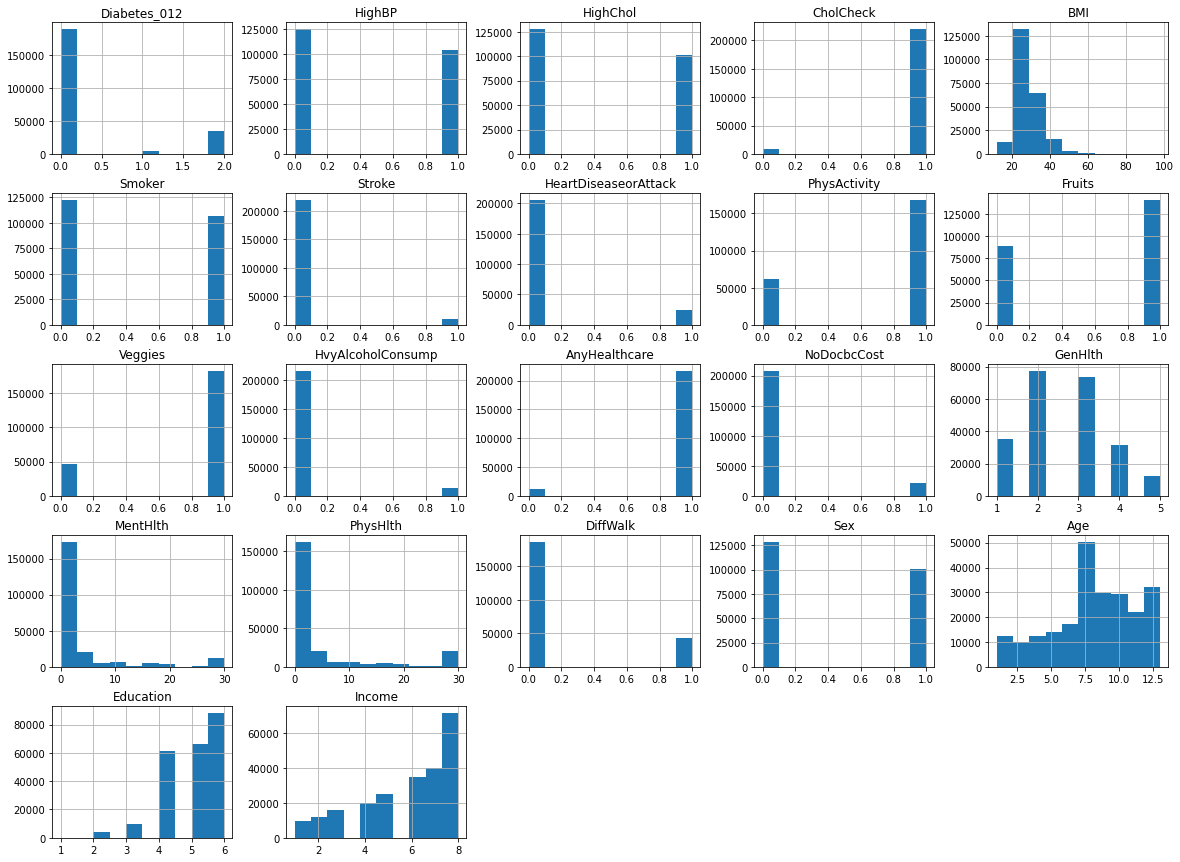

In [97]:
df.hist(figsize=(20,15))

Text(0.5, 1.0, 'Correlation of features')

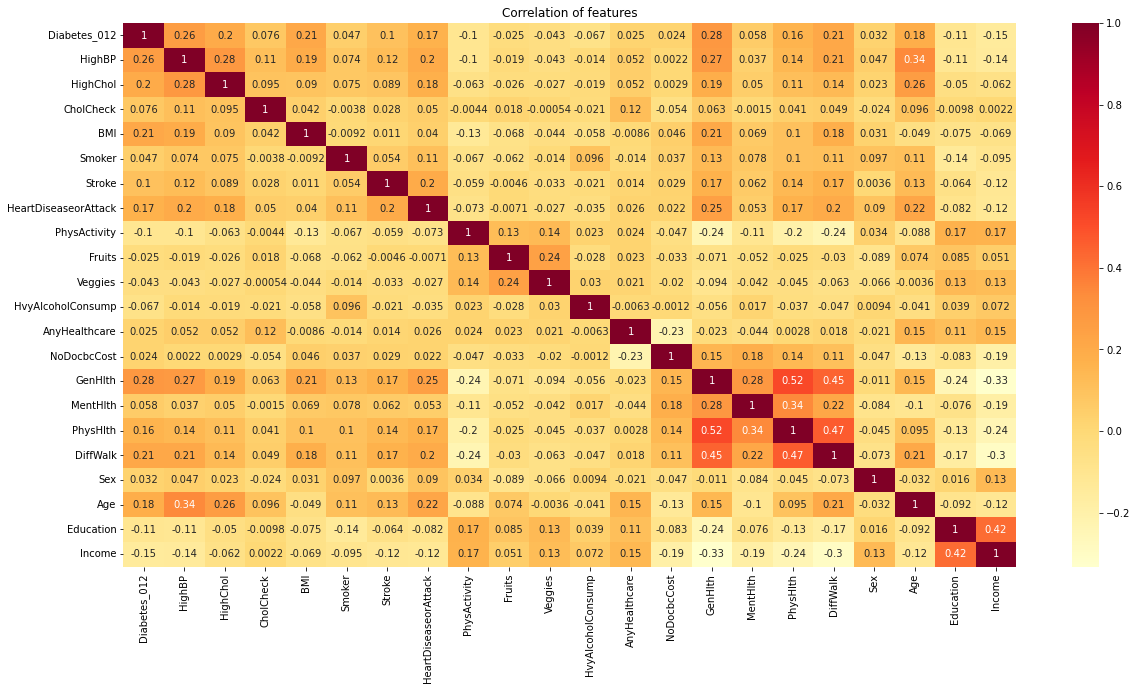

In [84]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation of features")

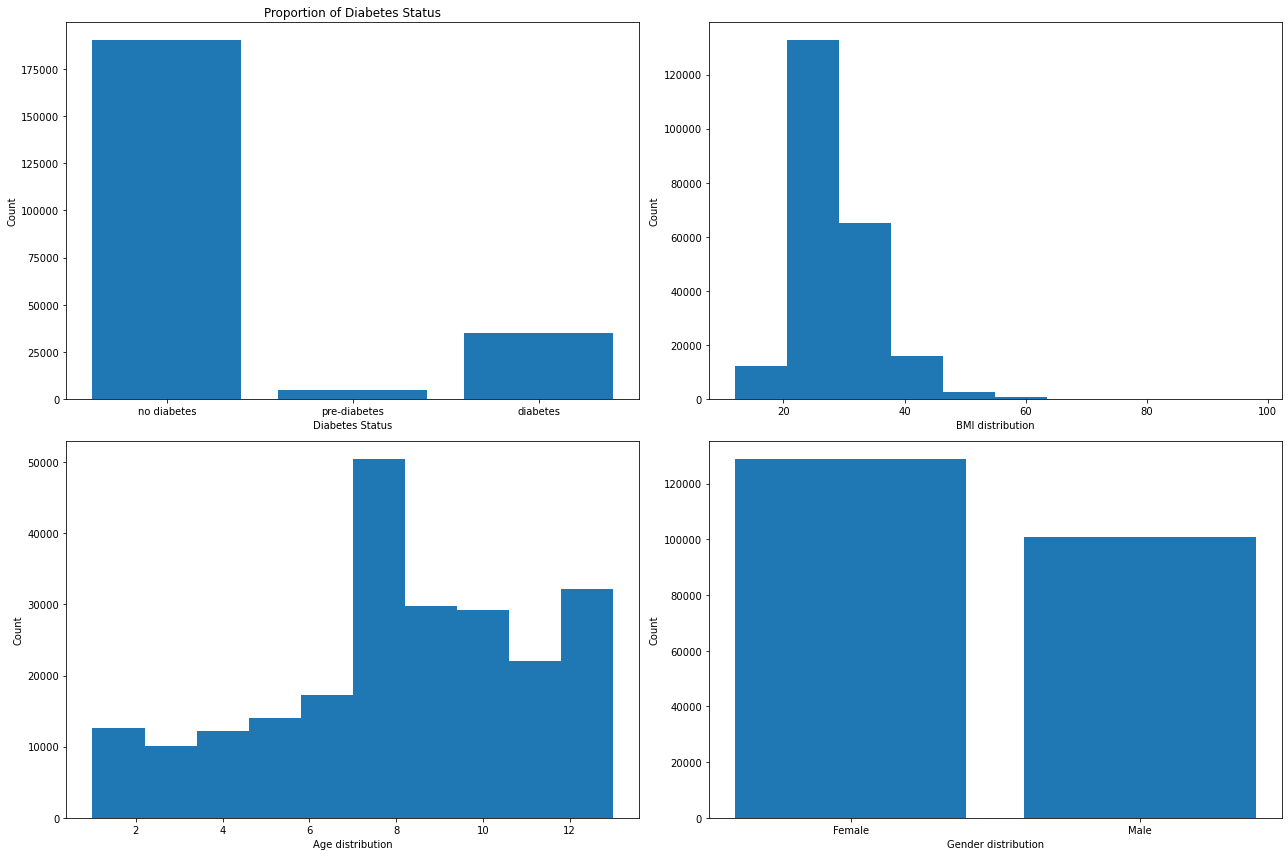

In [85]:
## check the proportion of the outcome variable
import matplotlib.pyplot as plt

df['Diabetes_012'] = df['Diabetes_012'].astype(int)
value_counts = df['Diabetes_012'].value_counts().sort_index()

# Create a dictionary to map values to labels
value_labels = {0: "no diabetes", 1: "pre-diabetes", 2: "diabetes"}

# Use list comprehension to get the labels for the x-axis
x_labels = [value_labels[val] for val in value_counts.index]

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.bar(x_labels, value_counts.values)
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.title("Proportion of Diabetes Status")


plt.subplot(2,2,2)
plt.hist(df['BMI'])
plt.xlabel("BMI distribution")
plt.ylabel("Count")

plt.subplot(2,2,3)
plt.hist(df['Age'])
plt.xlabel("Age distribution")
plt.ylabel("Count")

plt.subplot(2,2,4)
plt.bar(['Female', 'Male'], df['Sex'].value_counts().values)
plt.xlabel("Gender distribution")
plt.ylabel("Count")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

## there is a clear class imbalance in this; few patients are pre-diabetes

In [88]:
df['Diabetes_012'].value_counts()  / len(df)

0    0.827114
2    0.152741
1    0.020145
Name: Diabetes_012, dtype: float64

explained variance ratio (first two components): [0.15621168 0.08467388]


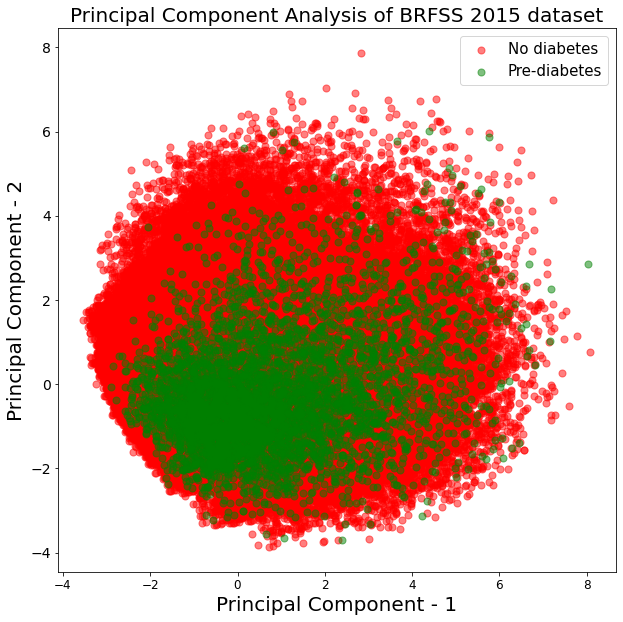

In [101]:
## Unsupervised clustering
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,1:]
X = StandardScaler().fit_transform(X) # normalizing the features
y = df.iloc[:,0]
pca = PCA(n_components=2)
principleComponent = pca.fit_transform(X)
principleComponent = pd.DataFrame(principleComponent, columns = ["PC1", "PC2"])
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# visualize the princinple components
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of BRFSS 2015 dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['Diabetes_012'] == target
    plt.scatter(principleComponent.loc[indicesToKeep, 'PC1']
               , principleComponent.loc[indicesToKeep, 'PC2'], c = color, s = 50, alpha=0.5)

plt.legend(['No diabetes', 'Pre-diabetes'],prop={'size': 15})
plt.show()

In [60]:
## feature selection with lasso regression
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

# Segregating the Feature and Target
X = df.drop("Diabetes_012", axis=1).values
y = df["Diabetes_012"].values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (183824, 21)
Shape of Test Features: (45957, 21)
Shape of Train Target: (183824,)
Shape of Test Target: (45957,)


In [61]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


Column Names: ['HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


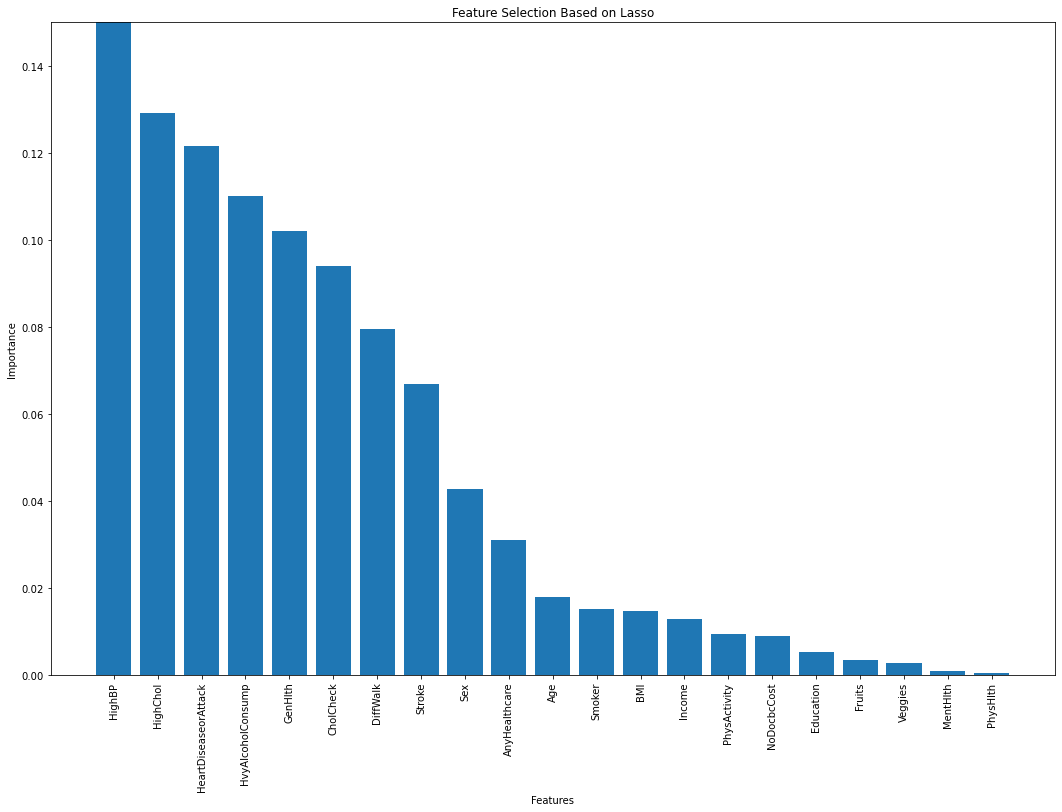

In [62]:
# calling the model with the best parameter
names = df.drop("Diabetes_012", axis=1).columns
print("Column Names: {}".format(names.values))
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# Sort the coefficients and corresponding names in descending order
sorted_indices = np.argsort(lasso1_coef)[::-1]  # Reverse the indices to get descending order

sorted_names = names[sorted_indices]
sorted_coef = lasso1_coef[sorted_indices]

# plotting the Column Names and Importance of Columns.
plt.figure(figsize=(18, 12))
plt.bar(sorted_names, sorted_coef)
plt.xticks(rotation=90)
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

explained variance ratio (first two components): [0.23334212 0.12128054]


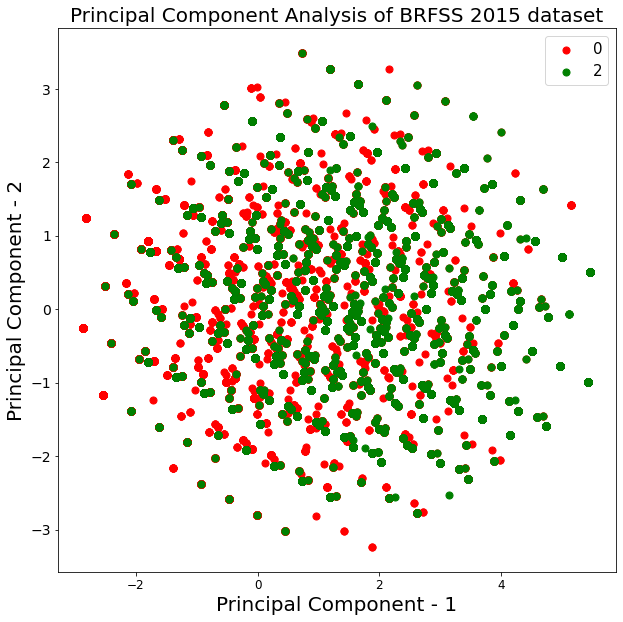

In [99]:
## Unsupervised clustering
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[sorted_names[:9]]
X = StandardScaler().fit_transform(X) # normalizing the features
y = df.iloc[:,0]
pca = PCA(n_components=2)
principleComponent = pca.fit_transform(X)
principleComponent = pd.DataFrame(principleComponent, columns = ["PC1", "PC2"])
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# visualize the princinple components
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of BRFSS 2015 dataset",fontsize=20)
targets = [0, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['Diabetes_012'] == target
    plt.scatter(principleComponent.loc[indicesToKeep, 'PC1']
               , principleComponent.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

Explained variance ratio (first two components): [0.99644026 0.00355974]


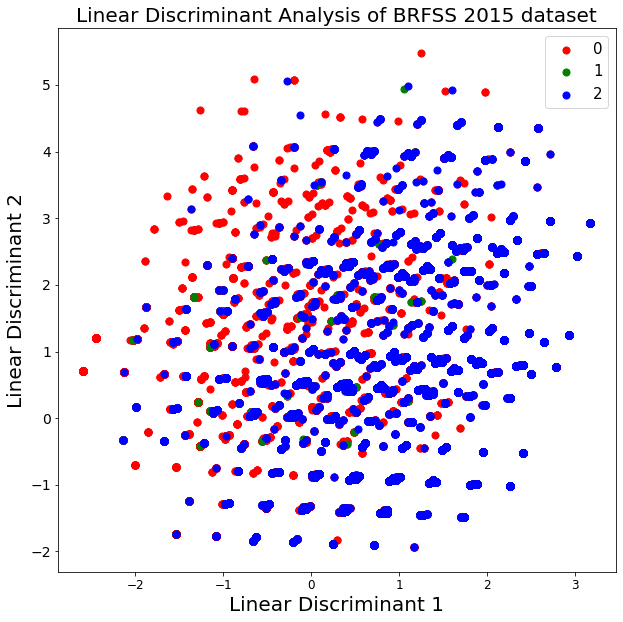

In [64]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame df and selected your features

X = df[sorted_names[:9]]
y = df['Diabetes_012']  # Assuming 'Diabetes_012' is your target variable

# Standardize the feature matrix
X = StandardScaler().fit_transform(X)

# Perform Linear Discriminant Analysis
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a DataFrame with LDA components
lda_components = pd.DataFrame(X_lda, columns=["LD1", "LD2"])

# Print the explained variance ratio
print("Explained variance ratio (first two components):", lda.explained_variance_ratio_)

# Visualize the LDA components
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Linear Discriminant 1', fontsize=20)
plt.ylabel('Linear Discriminant 2', fontsize=20)
plt.title("Linear Discriminant Analysis of BRFSS 2015 dataset", fontsize=20)

targets = [0, 1, 2]  # Replace with your actual class labels
colors = ['r', 'g', 'b']  # Replace with corresponding colors for your classes

for target, color in zip(targets, colors):
    indicesToKeep = y == target
    plt.scatter(lda_components.loc[indicesToKeep, 'LD1'],
                lda_components.loc[indicesToKeep, 'LD2'], c=color, s=50)

plt.legend(targets, prop={'size': 15})
plt.show()

Explained variance ratio (first three components): [0.23334212 0.12128054 0.11553916]


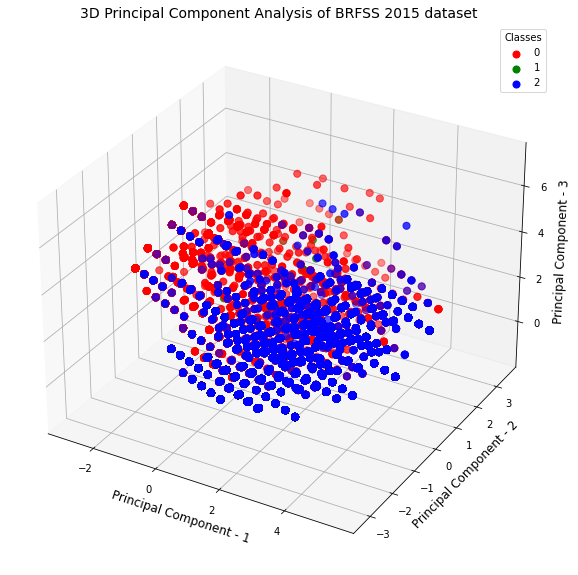

In [65]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

X = df[sorted_names[:9]]
X = StandardScaler().fit_transform(X)  # Normalizing the features
y = df.iloc[:, 0]

pca = PCA(n_components=3)  # Specify 3 components for 3D visualization
principleComponent = pca.fit_transform(X)
principleComponent = pd.DataFrame(principleComponent, columns=["PC1", "PC2", "PC3"])

print(
    "Explained variance ratio (first three components): %s"
    % str(pca.explained_variance_ratio_)
)

# Visualize the principle components in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component - 1', fontsize=12)
ax.set_ylabel('Principal Component - 2', fontsize=12)
ax.set_zlabel('Principal Component - 3', fontsize=12)
ax.set_title("3D Principal Component Analysis of BRFSS 2015 dataset", fontsize=14)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = df['Diabetes_012'] == target
    ax.scatter(
        principleComponent.loc[indicesToKeep, 'PC1'],
        principleComponent.loc[indicesToKeep, 'PC2'],
        principleComponent.loc[indicesToKeep, 'PC3'],
        c=color, s=50, label=str(target)
    )

ax.legend(targets, title='Classes', prop={'size': 10})
plt.show()